# Instructions

In all cases, written answers (apart from code) should not be longer than about three paragraphs.  Graders may not read all of your
submission if it is longer than that.

### Homework Reflection #5

1. Draw a diagram for the following negative feedback loop: A negative feedback loop means that one thing increases another while the second thing decreases the first.

**Sweating causes body temperature to decrease.  High body temperature causes sweating.**

*Remember that we are using directed acyclic graphs where two things cannot directly cause each other.*

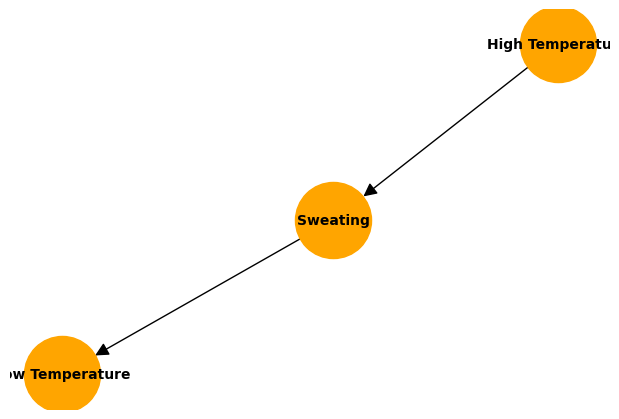

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(["High Temperature", "Sweating", "Low Temperature"])
G.add_edges_from([
    ("High Temperature", "Sweating"),
    ("Sweating", "Low Temperature")
])

plt.figure(figsize=(6,4))
pos = nx.spring_layout(G, seed=42)  # positions for nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="orange", arrowsize=20, font_size=10, font_weight="bold")
plt.show()

2. Describe an example of a positive feedback loop.  This means that one things increases another while the second things also increases the first.

**Anxiety -> social media usage -> anxiety**

The more you are anxious, the more you use social media to distract, the more anxious you become

3. Draw a diagram for the following situation:

**Lightning storms frighten away deer and bears, decreasing their population, and cause flowers to grow, increasing their population.
Bears eat deer, decreasing their population.
Deer eat flowers, decreasing their population.**

Write a dataset that simulates this situation.  (Show the code.) Include noise / randomness in all cases.

Identify a backdoor path with one or more confounders for the relationship between deer and flowers.

In [30]:
import numpy as np
import pandas as pd

num = 200
lightning = np.random.binomial(1, 0.3, num)  # 0/1 storms
deer = np.maximum(50 - 20*lightning + np.random.normal(0,5,num), 0)
bears = np.maximum(30 - 15*lightning + np.random.normal(0,3,num), 0)
flowers = np.maximum(40 + 25*lightning - 0.5*deer + np.random.normal(0,4,num), 0)
deer = np.maximum(deer - 0.3*bears, 0)
df = pd.DataFrame({"lightning": lightning, "deer": deer, "bears": bears, "flowers": flowers})


In [31]:
df.head()

,lightning,deer,bears,flowers
0,0,42.990404,22.871799,14.485660
1,0,43.185560,26.847095,13.314035
2,1,26.344796,17.877493,49.227573
3,1,27.448827,12.102117,53.336730
4,0,48.798881,25.317689,17.185711


** deer <- lightening -> flowers **

4. Draw a diagram for a situation of your own invention.  The diagram should include at least four nodes, one confounder, and one collider.  Be sure that it is acyclic (no loops).  Which node would say is most like a treatment (X)?  Which is most like an outcome (Y)?

Enrollment in a parenting support program helps improve child safety outcomes. 
- Families with higher income are both more likely to enroll (access/transport/time) and also tend to have better child safety outcomes regardless of the program. 
- Program participation and family income both influence caregiver stress (but for opposite reasons), and stress is not something we should control for because it’s a collider here.

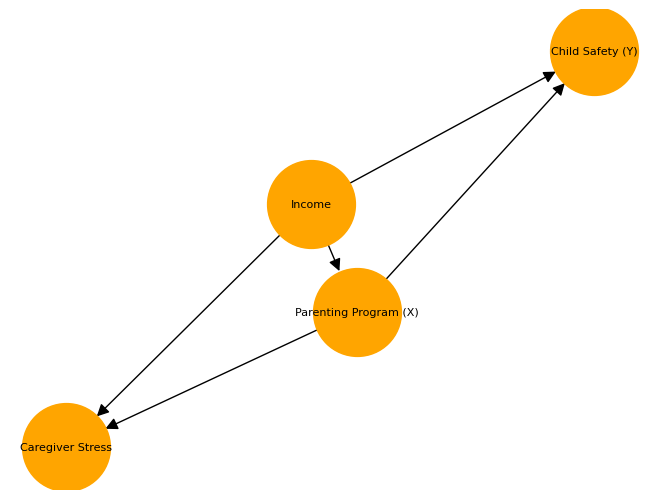

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([
    ("Income", "Parenting Program (X)"),
    ("Income", "Child Safety (Y)"),
    ("Parenting Program (X)", "Child Safety (Y)"),
    ("Parenting Program (X)", "Caregiver Stress"),
    ("Income", "Caregiver Stress")
])

nx.draw(G, with_labels=True, node_color="orange", node_size=4000, font_size=8, arrowsize=18)
plt.show()


This question and concept was much more compelex to think about and my example I am not sure if it fits